C:\Users\joeld\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Fitting 3 folds for each of 972 candidates, totalling 2916 fits


C:\Users\joeld\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:47:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Meilleurs hyperparamètres : {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 300, 'subsample': 0.6}
Accuracy Entraînement XGBoost : 0.9528795811518325
Accuracy Test XGBoost : 0.7466666666666667

Classification Report XGBoost :
              precision    recall  f1-score   support

           0       0.85      0.72      0.78        46
           1       0.64      0.79      0.71        29

    accuracy                           0.75        75
   macro avg       0.74      0.76      0.74        75
weighted avg       0.77      0.75      0.75        75



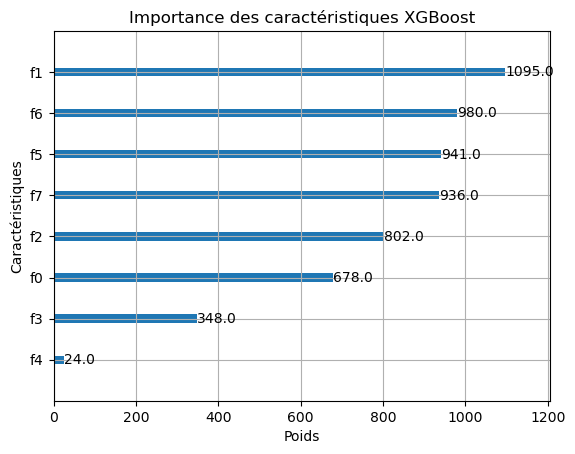


Modèle XGBoost optimisé sauvegardé sous 'final_xgboost_model.pkl'


In [1]:
# 1. Import des librairies nécessaires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import classification_report

# 2. Chargement du dataset
df = pd.read_csv("diabetes_cleaned_v2.csv")

# 3. Séparation des features (X) et de la cible (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# 4. Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Séparation en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 6. Appliquer SMOTE pour équilibrer les classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 7. Définition des hyperparamètres à tester pour XGBoost
param_grid = {
    'max_depth': [3, 5, 7, 10],  # Profondeur des arbres
    'learning_rate': [0.01, 0.1, 0.2],  # Taux d'apprentissage
    'n_estimators': [100, 200, 300],  # Nombre d'arbres
    'subsample': [0.6, 0.8, 1.0],  # Proportion d'échantillons par arbre
    'colsample_bytree': [0.6, 0.8, 1.0],  # Proportion de caractéristiques par arbre
    'gamma': [0, 0.1, 0.2]  # Paramètre de régularisation
}

# 8. Initialisation du modèle XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# 9. Application de GridSearchCV pour la recherche des meilleurs hyperparamètres
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# 10. Entraînement avec la recherche sur grille
grid_search.fit(X_train_resampled, y_train_resampled)

# 11. Meilleurs hyperparamètres trouvés
print(f"Meilleurs hyperparamètres : {grid_search.best_params_}")

# 12. Meilleur modèle basé sur GridSearchCV
best_xgb_model = grid_search.best_estimator_

# 13. Évaluation du modèle sur les données d'entraînement et de test
train_accuracy_xgb = best_xgb_model.score(X_train_resampled, y_train_resampled)
test_accuracy_xgb = best_xgb_model.score(X_test, y_test)

# 14. Affichage des résultats de l'entraînement et du test
print(f"Accuracy Entraînement XGBoost : {train_accuracy_xgb}")
print(f"Accuracy Test XGBoost : {test_accuracy_xgb}")

# 15. Rapport final sur les performances du modèle
y_pred_xgb = best_xgb_model.predict(X_test)

print("\nClassification Report XGBoost :")
print(classification_report(y_test, y_pred_xgb))

# 16. Visualisation de l'importance des caractéristiques
xgb.plot_importance(best_xgb_model, importance_type='weight', title='Importance des caractéristiques XGBoost', xlabel='Poids', ylabel='Caractéristiques')
plt.show()

# 17. Sauvegarde du modèle final optimisé
import joblib
joblib.dump(best_xgb_model, 'final_xgboost_model.pkl')
print("\nModèle XGBoost optimisé sauvegardé sous 'final_xgboost_model.pkl'")
